In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carga del Dataset Maestro Limpio
df = pd.read_csv('../data/procesada/master_dataset.csv')

# Conversión de fecha nuevamente (al cargar CSV se pierde el tipo datetime)
df['Fecha_consulta'] = pd.to_datetime(df['Fecha_consulta'])

print(f"Dataset cargado: {df.shape[0]} registros y {df.shape[1]} columnas.")
print("Listo para iniciar el perfilamiento del cliente.")

Dataset cargado: 1140532 registros y 24 columnas.
Listo para iniciar el perfilamiento del cliente.


Inicio del Análisis Descriptivo He cargado el dataset procesado para iniciar la exploración. Mi objetivo principal en esta fase es identificar patrones de comportamiento y demográficos que definan al cliente típico, así como detectar relaciones entre las variables independientes y la variable objetivo y.

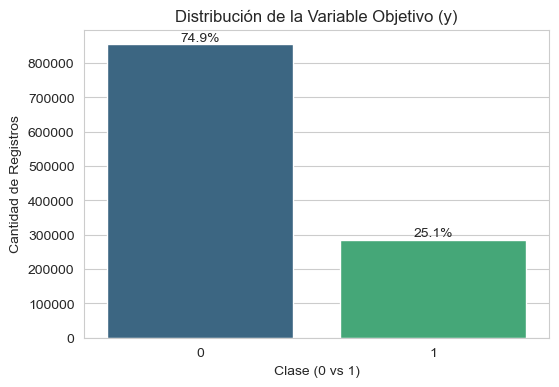

y
0    0.749257
1    0.250743
Name: proportion, dtype: float64


In [ ]:
# 1. Distribución de la Variable Objetivo 'y' 
plt.figure(figsize=(6, 4))

# Agrego hue='y' y legend=False para silenciar el warning
ax = sns.countplot(x='y', hue='y', data=df, palette='viridis', legend=False)

# Añadir porcentajes sobre las barras
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = height
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribución de la Variable Objetivo (y)')
plt.xlabel('Clase (0 vs 1)')
plt.ylabel('Cantidad de Registros')
plt.show()

# Conteo exacto
print(df['y'].value_counts(normalize=True))

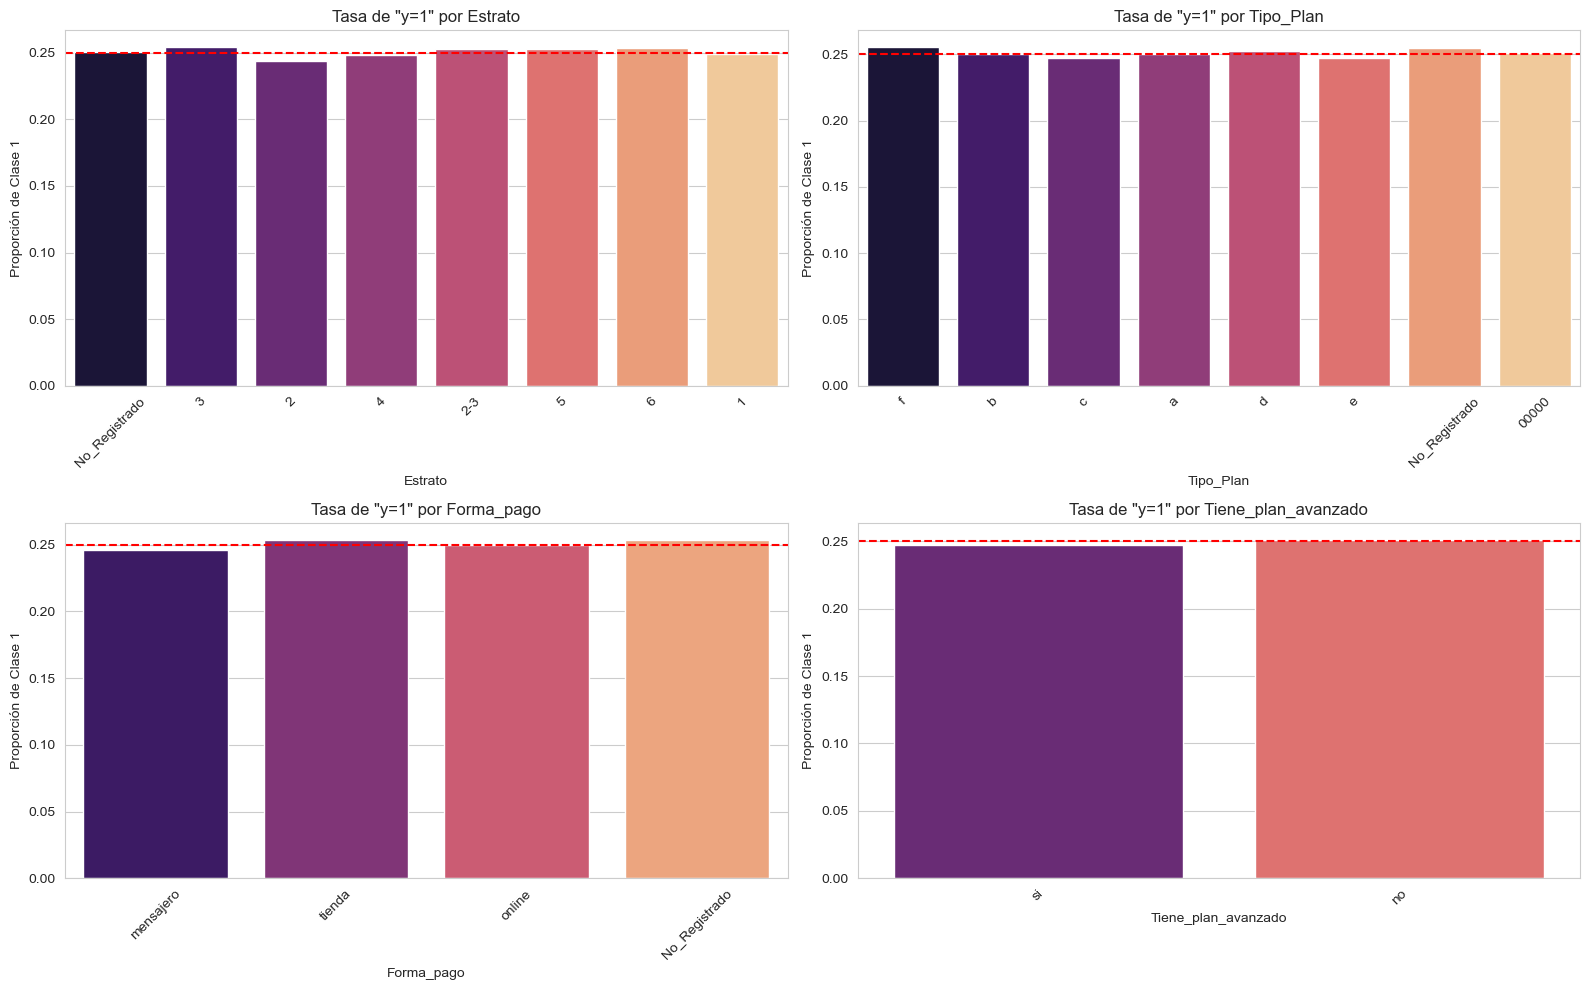

In [6]:
# Variables categóricas a analizar frente al Target
vars_cat_analisis = ['Estrato', 'Tipo_Plan', 'Forma_pago', 'Tiene_plan_avanzado']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten() # Aplanar para iterar fácil

for i, var in enumerate(vars_cat_analisis):
    # Calculamos el promedio de y (que equivale al % de unos)
    # ci=None quita las barras de error para limpiar el gráfico
    sns.barplot(x=var, y='y', hue=var, data=df, ax=axes[i], palette='magma', legend=False, errorbar=None)
    
    # Línea de referencia del promedio global (25%)
    axes[i].axhline(y=0.25, color='red', linestyle='--', label='Promedio Global (25%)')
    
    axes[i].set_title(f'Tasa de "y=1" por {var}')
    axes[i].set_ylabel('Proporción de Clase 1')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

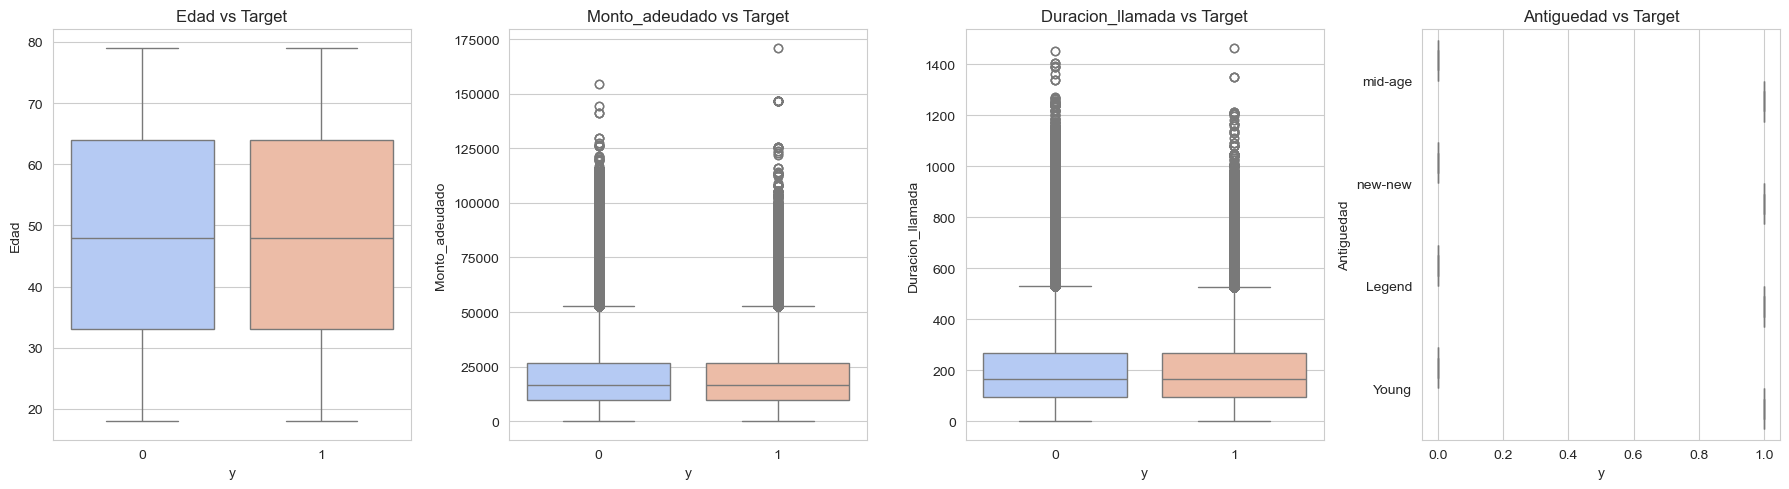

In [7]:
# Variables numéricas clave
vars_num = ['Edad', 'Monto_adeudado', 'Duracion_llamada', 'Antiguedad']

# Filtramos columnas que realmente existan en el df para evitar errores
vars_num = [col for col in vars_num if col in df.columns]

fig, axes = plt.subplots(1, len(vars_num), figsize=(18, 5))

for i, var in enumerate(vars_num):
    sns.boxplot(x='y', y=var, hue='y', data=df, ax=axes[i], palette='coolwarm', legend=False)
    axes[i].set_title(f'{var} vs Target')

plt.tight_layout()
plt.show()

Variables numéricas validadas para correlación: ['Edad', 'Monto_adeudado', 'Duracion_llamada', 'Tiempo_en_espera', 'y']


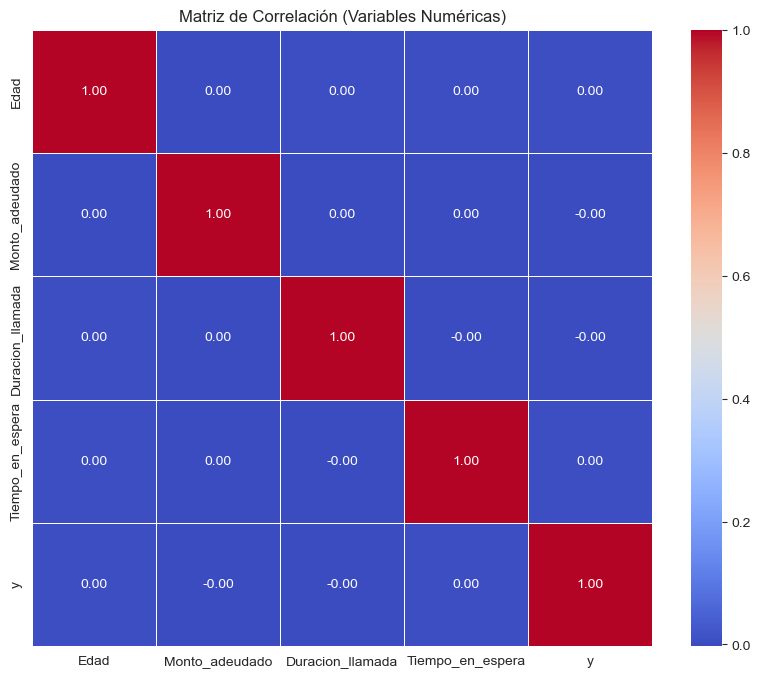

In [9]:
# Selección de variables candidatas
vars_corr = ['Edad', 'Monto_adeudado', 'Duracion_llamada', 'Tiempo_en_espera', 'Antiguedad', 'y']

# Filtrado Inteligente:
# Solo seleccionamos las columnas de vars_corr que existen en el DF Y ADEMÁS son numéricas.
# Esto elimina automáticamente 'Antiguedad' si tiene texto como 'mid-age'.
vars_numericas_reales = df[vars_corr].select_dtypes(include=['float64', 'int64', 'int32']).columns

print(f"Variables numéricas validadas para correlación: {list(vars_numericas_reales)}")

# Cálculo de la matriz
correlation_matrix = df[vars_numericas_reales].corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()